In [1]:
%matplotlib inline

import seaborn as sns
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

sns.set_context("talk")
sns.set_style("white")
sns.set_palette("Accent")

plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [2]:
df = pd.read_csv("googlesurvey.csv")
df.head()

,Timestamp,1-1. 강의 전까지 본인의 파이썬 경험',1-2. 강의 전까지 본인의 머신러닝 경험,1-3. 강의 전까지 본인 연구에 머신러닝 활용 계획,1-4. 본인의 연차,2-1. 강의 커리큘럼 - 슬라이드 & 예제 코드,2-2. 강의 속도,2-3. 강의 난이도,2-4. 강의 전달력,2-5. 동료에게 추천 의사,3-1. 강의 후 파이썬 학습 의사,3-2. 강의 후 머신러닝 학습 의사,3-3. 강의 후 본인 연구에 머신러닝 활용 의사,4. 건의사항 등 강사에게 하고싶은 말 (optional)
0,2021/05/18 12:42:36 PM GMT+9,2,2,3,석사과정 학생,5,3,3,5,5,4,5,5,좋은 강의 감사합니다 :)
1,2021/05/18 12:49:49 PM GMT+9,5,4,5,박사학위 소지자,4,4,3,4,5,5,5,5,NaN
2,2021/05/18 1:45:18 PM GMT+9,3,3,4,석사과정 학생,4,4,4,5,4,5,5,4,강의력도 너무 좋으시고 머신러닝하면서 실제 부딪히는 문제점들에 대해 어떻게 해결해...
3,2021/05/18 1:58:30 PM GMT+9,2,3,3,박사과정 학생,3,3,2,5,5,3,3,3,감사합니다.
4,2021/05/18 2:08:23 PM GMT+9,1,1,2,박사과정 학생,4,3,3,5,5,5,5,5,"좋은 수업 감사드립니다. 가장 좋았던 점은 RF 사용에 있어, 한번도 사용해보지 않..."


In [5]:
Qs = df.columns
Qs

Index(['Timestamp', '1-1. 강의 전까지 본인의 파이썬 경험'', '1-2. 강의 전까지 본인의 머신러닝 경험',
       '1-3. 강의 전까지 본인 연구에 머신러닝 활용 계획', '1-4. 본인의 연차',
       '2-1. 강의 커리큘럼 - 슬라이드 & 예제 코드', '2-2. 강의 속도', '2-3. 강의 난이도',
       '2-4. 강의 전달력', '2-5. 동료에게 추천 의사', '3-1. 강의 후 파이썬 학습 의사',
       '3-2. 강의 후 머신러닝 학습 의사', '3-3. 강의 후 본인 연구에 머신러닝 활용 의사',
       '4. 건의사항 등 강사에게 하고싶은 말 (optional)'],
      dtype='object')

In [40]:
from matplotlib import cm

def plot_count(x, data, color="C0", cmap=None, ticks=range(1, 6), ticklabels=None,
               orient="v", ax=None, ec="none", figsize=(10, 5), filename=None):
    if not ax:
        fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)
    
    val_cnt = data[x].value_counts().to_dict()
    cnt_list = [val_cnt[k] if k in val_cnt.keys() else 0 for k in ticks]
    
    if orient == "v":
        ax.bar(x=range(1, 6), height=cnt_list, fc=color, ec=ec)
    elif orient == "h":
        ax.barh(y=range(1, 6), width=cnt_list, fc=color, ec=ec)
    
    xlabel = x.replace("'","")
    font_label = {"color":"gray", "fontsize":"large", "fontweight":"bold"}
                
    ax.set_title(xlabel, fontdict=font_label, pad=12)
    
    if orient == "v":
        yticks = [int(y) for y in ax.get_yticks() if not (y*10)%10]
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticks)
        ax.grid(axis="y")       
        ax.set_ylabel("count", fontdict=font_label, labelpad=8)
        
        if ticklabels:
            ax.set_xticks(range(1, 6))
            ax.set_xticklabels(ticklabels, fontweight="bold")
            ax.set_xlabel("")
        
    if orient == "h":
        xticks = [int(x) for x in ax.get_xticks() if not (x*10)%10]
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticks)
        ax.grid(axis="x")       
        ax.set_xlabel("count", fontdict=font_label, labelpad=8)
        
        if ticklabels:
            ax.set_yticks(range(1, 6))
            ax.set_yticklabels(ticklabels, fontweight="bold")
            ax.set_ylabel("")
    
    if cmap:
        ncmaps = 7
        if ticklabels:
            ncmaps = len(ticklabels) + 2
        # 컬러맵 불러오기
        cmap_ = plt.get_cmap(cmap, ncmaps)
        for i, p in enumerate(ax.patches, 1):
            p.set_facecolor(cmap_(i))        
    
    if not ax and filename:
        fig.savefig(filename, dpi=200)
        
    return ax
    

<AxesSubplot:title={'center':'1-1. 강의 전까지 본인의 파이썬 경험'}, ylabel='count'>

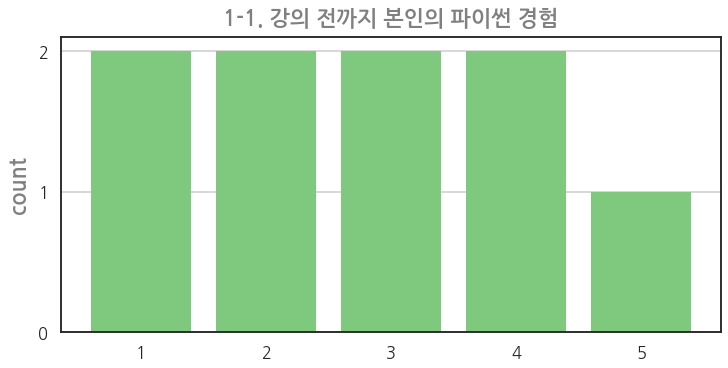

In [41]:
plot_count(Qs[1], df, filename="75_survey07.png")

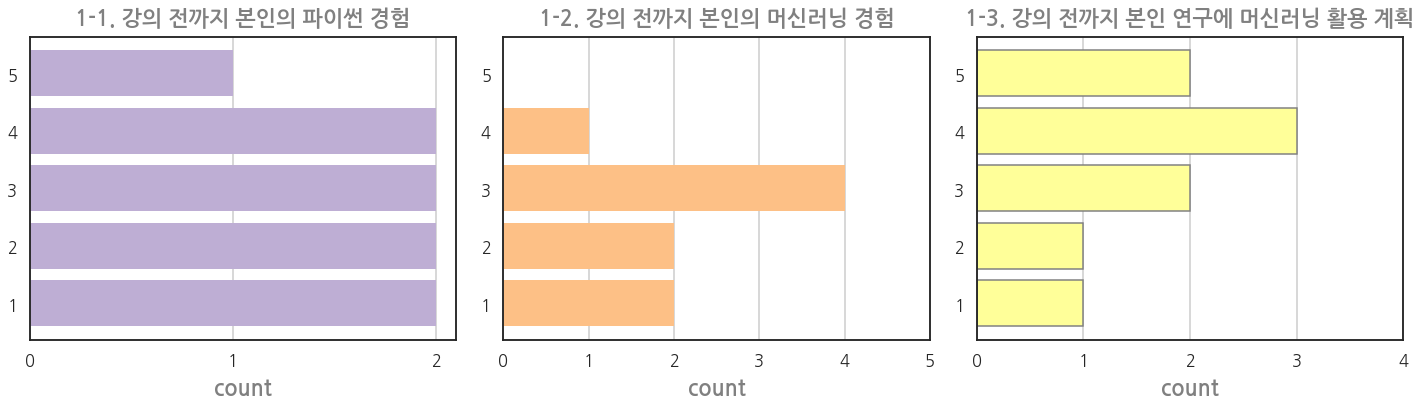

In [52]:
fig, axs = plt.subplots(ncols=3, figsize=(20, 6))
plot_count(Qs[1], df, orient="h", color="C1", ax=axs[0])
plot_count(Qs[2], df, orient="h", color="C2", ax=axs[1])
plot_count(Qs[3], df, orient="h", color="C3", ec="gray", ax=axs[2])
fig.tight_layout()
fig.savefig("75_survey08.png")

<AxesSubplot:title={'center':'1-1. 강의 전까지 본인의 파이썬 경험'}, ylabel='count'>

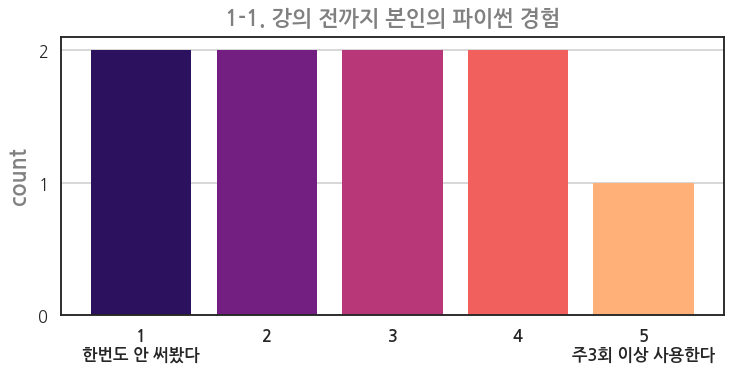

In [23]:
plot_count(Qs[1], df, filename="Q1.png", cmap="magma", 
           ticklabels=["1\n한번도 안 써봤다", "2\n", "3\n", "4\n", "5\n주3회 이상 사용한다"])

<AxesSubplot:title={'center':'1-2. 강의 전까지 본인의 머신러닝 경험'}, ylabel='count'>

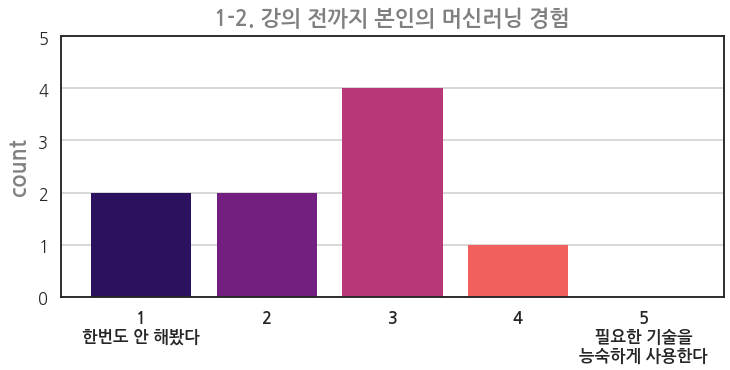

In [24]:
plot_count(Qs[2], df, filename="Q2.png", cmap="magma",
           ticklabels=["1\n한번도 안 해봤다", "2\n", "3\n", "4\n", "5\n필요한 기술을\n능숙하게 사용한다"])

<AxesSubplot:title={'center':'1-3. 강의 전까지 본인 연구에 머신러닝 활용 계획'}, ylabel='count'>

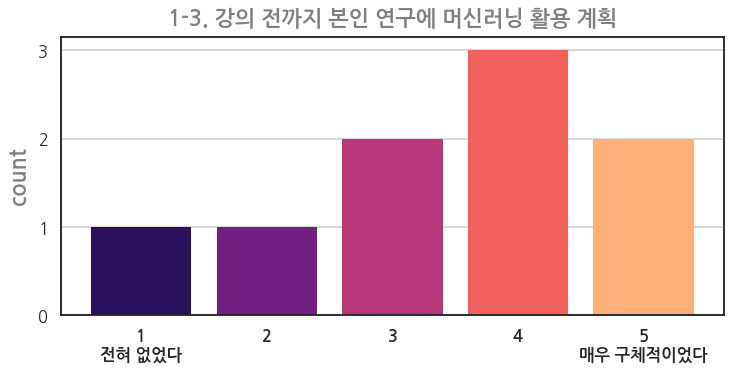

In [25]:
plot_count(Qs[3], df, filename="Q3.png", cmap="magma",
           ticklabels=["1\n전혀 없었다", "2\n", "3\n", "4\n", "5\n매우 구체적이었다"])

<AxesSubplot:title={'center':'1-4. 본인의 연차'}, xlabel='count'>

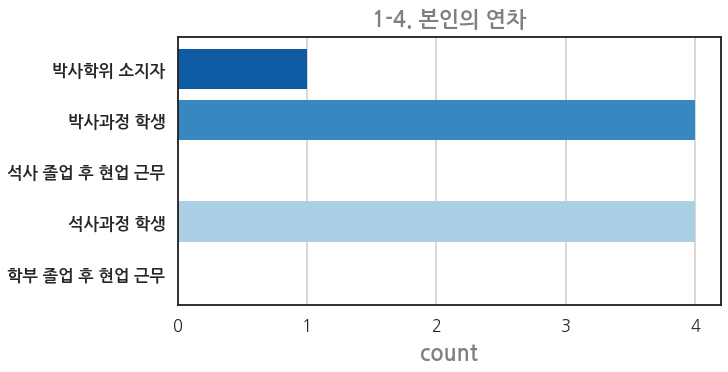

In [26]:
plot_count(Qs[4], df, filename="Q4.png", cmap="Blues", orient="h",
           ticks=["학부 졸업 후 현업 근무", "석사과정 학생", "석사 졸업 후 현업 근무", "박사과정 학생", "박사학위 소지자"], 
           ticklabels=["학부 졸업 후 현업 근무", "석사과정 학생", "석사 졸업 후 현업 근무", 
                        "박사과정 학생", "박사학위 소지자"])

<AxesSubplot:title={'center':'2-1. 강의 커리큘럼 - 슬라이드 & 예제 코드'}, ylabel='count'>

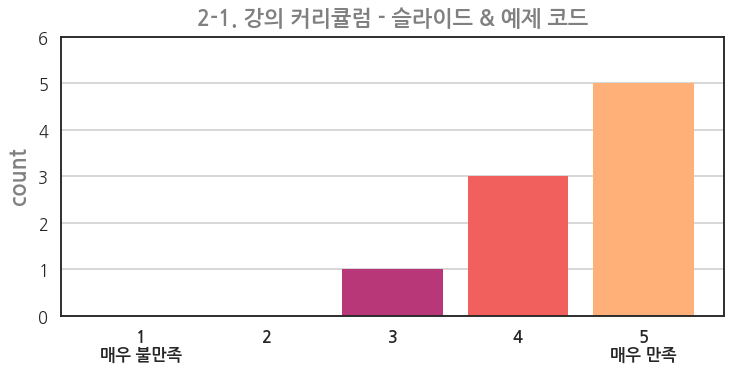

In [27]:
plot_count(Qs[5], df, filename="Q5.png", cmap="magma",
           ticklabels=["1\n매우 불만족", "2\n", "3\n", "4\n", "5\n매우 만족"])

<AxesSubplot:title={'center':'2-2. 강의 속도'}, ylabel='count'>

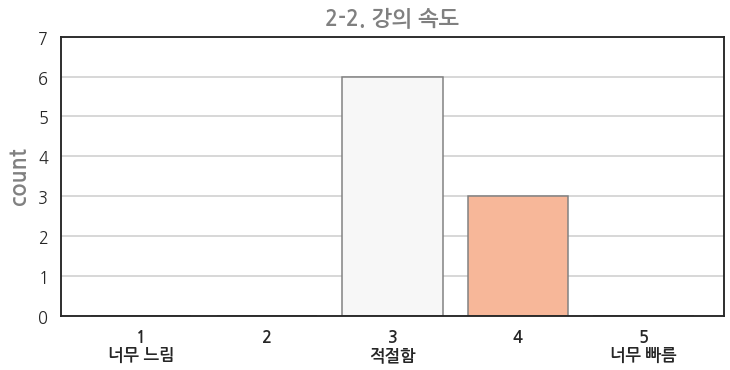

In [28]:
plot_count(Qs[6], df, filename="Q6.png", cmap="RdBu_r", ec="gray",
           ticklabels=["1\n너무 느림", "2\n", "3\n적절함", "4\n", "5\n너무 빠름"])

<AxesSubplot:title={'center':'2-3. 강의 난이도'}, ylabel='count'>

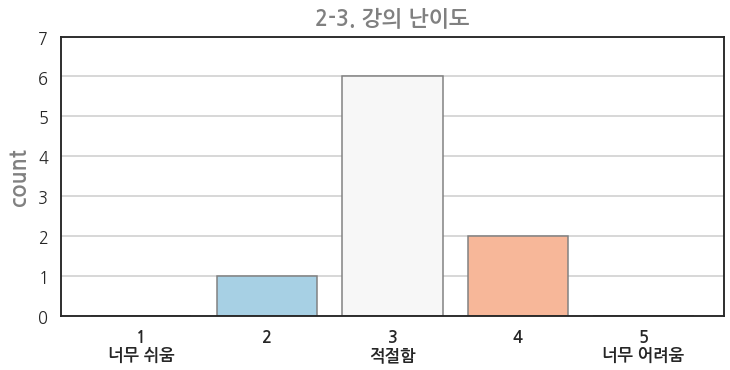

In [29]:
plot_count(Qs[7], df, filename="Q7.png", cmap="RdBu_r", ec="gray",
           ticklabels=["1\n너무 쉬움", "2\n", "3\n적절함", "4\n", "5\n너무 어려움"])

<AxesSubplot:title={'center':'2-4. 강의 전달력'}, ylabel='count'>

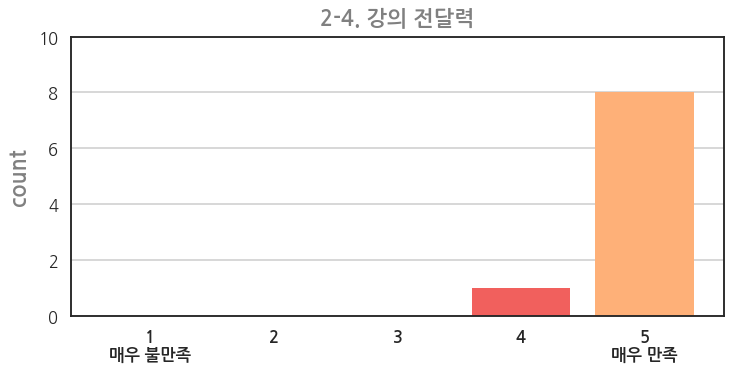

In [30]:
plot_count(Qs[8], df, filename="Q8.png", cmap="magma",
           ticklabels=["1\n매우 불만족", "2\n", "3\n", "4\n", "5\n매우 만족"])

<AxesSubplot:title={'center':'2-5. 동료에게 추천 의사'}, ylabel='count'>

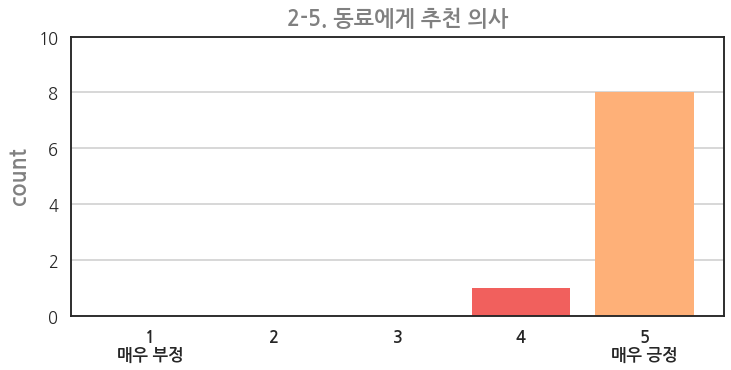

In [31]:
plot_count(Qs[9], df, filename="Q9.png", cmap="magma",
           ticklabels=["1\n매우 부정", "2\n", "3\n", "4\n", "5\n매우 긍정"])

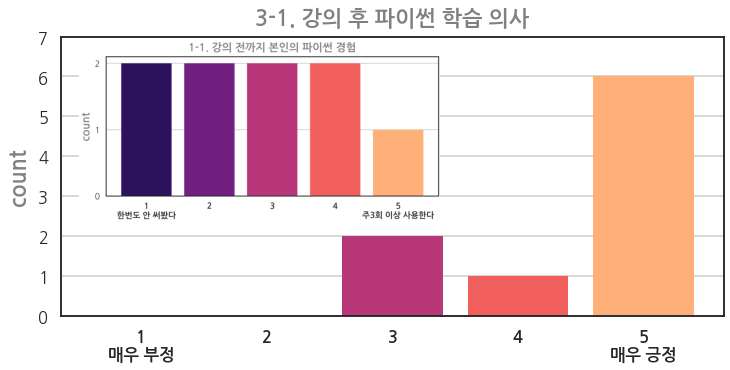

In [53]:
ax = plot_count(Qs[10], df, cmap="magma",
           ticklabels=["1\n매우 부정", "2\n", "3\n", "4\n", "5\n매우 긍정"])
fig = ax.figure

ax_prev = fig.add_axes([0.05, 0.4, 0.6, 0.5])
im_prev = plt.imread("Q1.png")
ax_prev.imshow(im_prev)
ax_prev.axis(False)
fig.savefig("Q10.png", dpi=200)

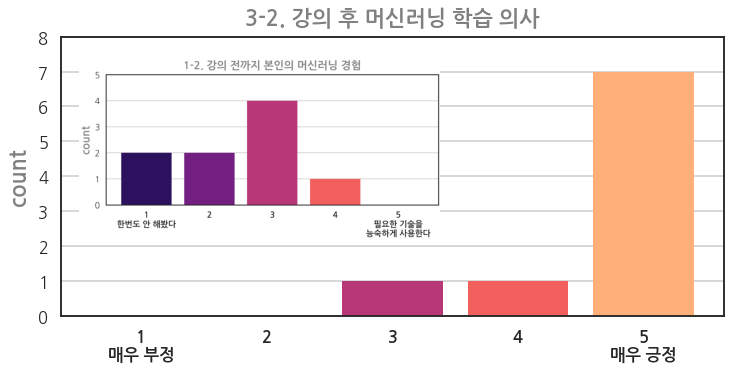

In [54]:
ax = plot_count(Qs[11], df, cmap="magma",
           ticklabels=["1\n매우 부정", "2\n", "3\n", "4\n", "5\n매우 긍정"])

fig = ax.figure
ax_prev = fig.add_axes([0.05, 0.35, 0.6, 0.5])
im_prev = plt.imread("Q2.png")
ax_prev.imshow(im_prev)
ax_prev.axis(False)
fig.savefig("Q11.png", dpi=200)

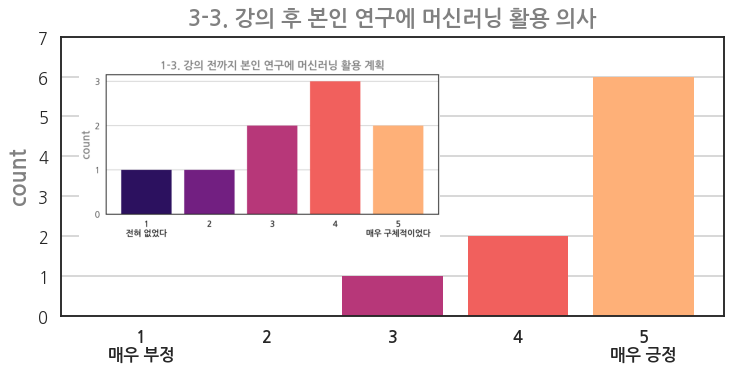

In [55]:
ax = plot_count(Qs[12], df, cmap="magma",
           ticklabels=["1\n매우 부정", "2\n", "3\n", "4\n", "5\n매우 긍정"])

fig = ax.figure
ax_prev = fig.add_axes([0.05, 0.35, 0.6, 0.5])
im_prev = plt.imread("Q3.png")
ax_prev.imshow(im_prev)
ax_prev.axis(False)
fig.savefig("Q12.png", dpi=200)